In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('play_tennis_train.csv')

le_outlook = LabelEncoder()
le_outlook.fit(df['outlook']) 

le_temp = LabelEncoder()
le_temp.fit(df['temp']) 

le_humidity = LabelEncoder()
le_humidity.fit(df['humidity']) 

le_wind = LabelEncoder()
le_wind.fit(df['wind']) 

le_play = LabelEncoder()
le_play.fit(df['play']) 

df['outlook_num'] = le_outlook.transform(df['outlook']) 
df['temp_num'] = le_temp.transform(df['temp']) 
df['humidity_num'] = le_humidity.transform(df['humidity']) 
df['wind_num'] = le_wind.transform(df['wind']) 
df['play_num'] = le_play.transform(df['play']) 

df.to_csv('play_tennis_train_encoded.csv')

for c in le_outlook.classes_:
        print(c, le_outlook.transform([c])[0])
for c in le_temp.classes_:
        print(c, le_temp.transform([c])[0])
for c in le_humidity.classes_:
        print(c, le_humidity.transform([c])[0])
for c in le_wind.classes_:
        print(c, le_wind.transform([c])[0])
for c in le_play.classes_:
        print(c, le_play.transform([c])[0])

Overcast 0
Rain 1
Sunny 2
Cool 0
Hot 1
Mild 2
High 0
Normal 1
Strong 0
Weak 1
No 0
Yes 1


In [51]:
from sklearn.tree import DecisionTreeClassifier

X = df[['outlook_num','temp_num','humidity_num','wind_num']]
y = df['play_num']

model = DecisionTreeClassifier(criterion="entropy")

model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [52]:
dnewDay = ['Sunny','Cool', 'High','Weak']
print(dnewDay)

outlook = dnewDay[0]
temp = dnewDay[1]
humidity = dnewDay[2]
wind = dnewDay[3]

outlook_num = le_outlook.transform([outlook])[0]

temp_num = le_temp.transform([temp])[0]

humidity_num = le_humidity.transform([humidity])[0]

wind_num = le_wind.transform([wind])[0]

dnewDay_num = [[outlook_num, temp_num, humidity_num, wind_num]]
print(dnewDay_num)

day_info = pd.DataFrame(dnewDay_num, columns=['outlook_num', 'temp_num', 'humidity_num', 'wind_num'])


pred_code = model.predict(day_info)
print("Class code= ", pred_code)

pred_class = le_play.inverse_transform(pred_code)
print("Class= ", pred_class)

['Sunny', 'Cool', 'High', 'Weak']
[[2, 0, 0, 1]]
Class code=  [0]
Class=  ['No']


In [53]:
from sklearn import tree

text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_1 <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1.00
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1



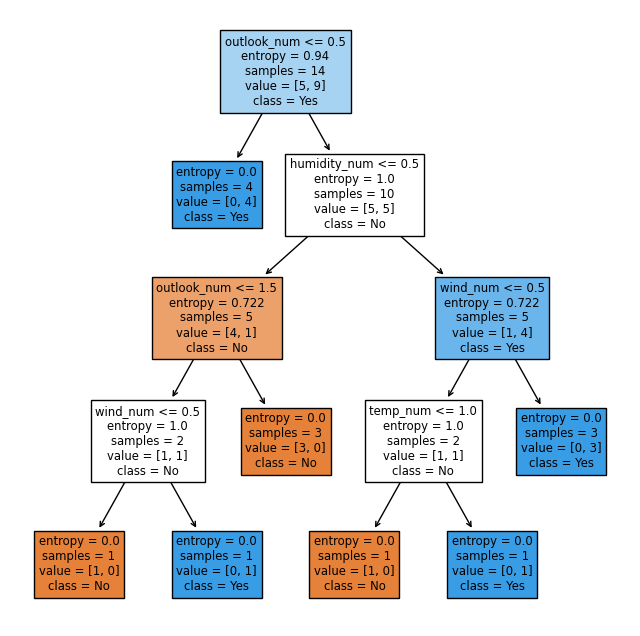

In [54]:
feature_names = ['outlook_num','temp_num','humidity_num','wind_num']

target_names = ['No','Yes']

from matplotlib import pyplot

fig = pyplot.figure(figsize=(8,8))
_ = tree.plot_tree(model, feature_names=feature_names, class_names=target_names, filled=True)

In [55]:
# مصفوفة الارتباك
from sklearn.metrics import confusion_matrix
# مقياس الصحة
from sklearn.metrics import accuracy_score
# مقياس الدقة
from sklearn.metrics import precision_score
# مقياس الاستذكار
from sklearn.metrics import recall_score
# F1
from sklearn.metrics import f1_score


# X , y
ypred=model.predict(X)

# حساب مصفوفة الارتباك
cf_matrix = confusion_matrix(ypred, y, labels=[0,1])
print ('Confusion Matrix:')
print (cf_matrix)
# تسميات قيم مصفوفة الارتباك
TP=cf_matrix[0,0]
TN=cf_matrix[1,1]
FP=cf_matrix[0,1]
FN=cf_matrix[1,0]
print ('TP :{:.2f}'.format(TP))
print ('TN :{:.2f}'.format(TN))
print ('FP :{:.2f}'.format(FP))
print ('FN :{:.2f}'.format(FN))

# حساب مقاييس الأداء
print ('Accuracy Score :{:.2f}'.format(accuracy_score(ypred, y)*100))
print ('Precision Score :{:.2f}'.format(precision_score(ypred, y, pos_label=0)*100))
print ('Recall Score :{:.2f}'.format(recall_score(ypred, y, pos_label=0)*100))
print ('F1 Score :{:.2f}'.format(f1_score(ypred, y, pos_label=0)*100))
print ('Specificity :{:.2f}'.format(FP/(FP+TN)*100))

Confusion Matrix:
[[5 0]
 [0 9]]
TP :5.00
TN :9.00
FP :0.00
FN :0.00
Accuracy Score :100.00
Precision Score :100.00
Recall Score :100.00
F1 Score :100.00
Specificity :0.00
